In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('archive/books.csv', on_bad_lines='warn')
df = df.drop(['bookID'], axis=1)
print(df.head())

                                               title  \
0  Harry Potter and the Half-Blood Prince (Harry ...   
1  Harry Potter and the Order of the Phoenix (Har...   
2  Harry Potter and the Chamber of Secrets (Harry...   
3  Harry Potter and the Prisoner of Azkaban (Harr...   
4  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   
2                J.K. Rowling            4.42  0439554896  9780439554893   
3  J.K. Rowling/Mary GrandPré            4.56  043965548X  9780439655484   
4  J.K. Rowling/Mary GrandPré            4.78  0439682584  9780439682589   

  language_code    num_pages  ratings_count  text_reviews_count  \
0           eng          652        2095690               27591   
1           eng          870        2153167               29221   
2    

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn                11127 non-null  object 
 4   isbn13              11127 non-null  int64  
 5   language_code       11127 non-null  object 
 6     num_pages         11127 non-null  int64  
 7   ratings_count       11127 non-null  int64  
 8   text_reviews_count  11127 non-null  int64  
 9   publication_date    11127 non-null  object 
 10  publisher           11127 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 956.4+ KB
None


In [23]:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


<AxesSubplot: xlabel='average_rating', ylabel='title'>

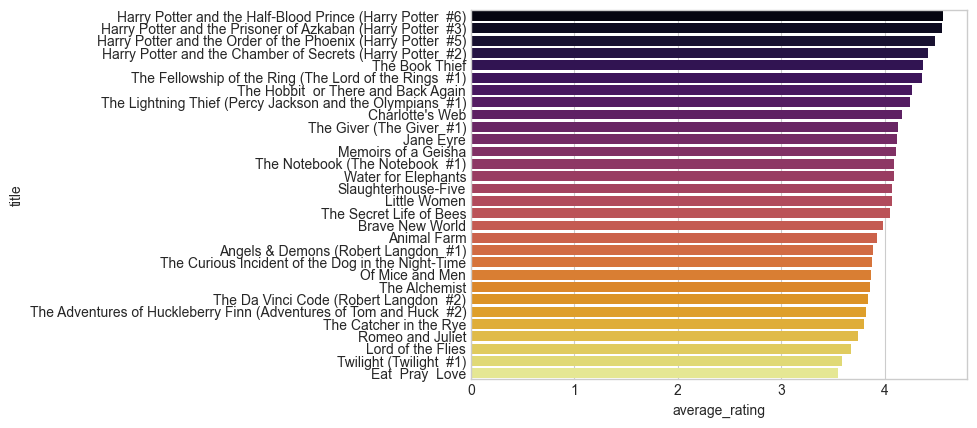

In [24]:
top_books = df[df['ratings_count'] > 1000000]
top_books = top_books.sort_values(by='average_rating', ascending=False)

plt.style.use('seaborn-whitegrid')
sns.barplot(x="average_rating", y="title", data=top_books, palette='inferno')

In [25]:
print(top_books['ratings_count'])

0        2095690
3        2339585
1        2153167
4416     2293963
5272     1516367
23       2128944
1697     2530894
7312     1766725
6425     1300470
1069     1585589
2764     1409369
299      1301083
4431     1090603
10704    1260027
1430     1001671
591      1479727
9437     1044725
1467     1247221
2114     2111750
307      2418736
514      1054308
294      1755253
284      1631221
310      1679706
898      1049912
1462     2457092
5017     1893917
2116     2036679
10340    4597666
5409     1362264
Name: ratings_count, dtype: int64


<AxesSubplot: >

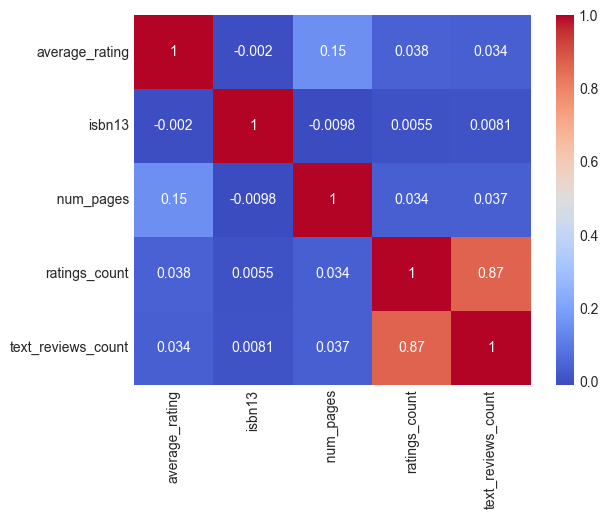

In [26]:
import matplotlib.pyplot as plt
corr_mat = df.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

## knn

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

selected_cat_cols = ['authors', 'language_code', 'publisher']
selected_num_cols = ['average_rating', 'ratings_count', ]

transformer = make_column_transformer((OneHotEncoder(),  selected_cat_cols), (StandardScaler(), selected_num_cols))

transformed_data = transformer.fit_transform(df)

In [28]:
from sklearn.neighbors import NearestNeighbors
import joblib

knn = NearestNeighbors(algorithm='auto')
knn.fit(transformed_data)
joblib.dump(knn, 'knn_recommender.pkl')

['knn_recommender.pkl']

In [78]:
def get_book_index(title):
    return df.loc[df['title'] == title].index[0]

In [79]:
def get_book_title(index):
    return ''.join((df.loc[df.index == index, 'title'].values))

In [80]:
print(get_book_title(3))

Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)


In [81]:
def similar_books(query_index, n_books=5):
    query = transformed_data.getrow(query_index)
    distances, indices = knn.kneighbors(query, n_neighbors=n_books+1)
    books = []
    for index in indices[0]:
        if index == query_index:
            continue
        
        books.append(get_book_title(index))
    return books

In [83]:
query_book = 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)'
recommendations = similar_books(get_book_index(query_book))
print(recommendations[0])

Harry Potter and the Chamber of Secrets (Harry Potter  #2)


In [87]:
books = df['title'].values
print(books)

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)' ...
 'The Ice-Shirt (Seven Dreams #1)' 'Poor People'
 'Las aventuras de Tom Sawyer']
